In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# Dataset link

In [2]:
dataset_dir = r"G:\MY PROJECTS\TENSORFLOW\Face Mask Detection with Custom CNN\archive"

# Load dataset using image_dataset_from_directory

In [3]:
dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    image_size=(128, 128),                         # Resize all images to 128x128
    batch_size=32,                                 # Batch size
    label_mode='int',                              # Integer labels (0 or 1)
    validation_split=0.2,                          # 80-20 split
    subset="both",                                 # Load both train and val splits
    seed=42
)
 
train_ds, val_ds = dataset                         # Unpack training and validation sets

Found 7553 files belonging to 1 classes.
Using 6043 files for training.
Using 1510 files for validation.


# Prefetch for performance

In [4]:
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

# Define the custom CNN model

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(128, 128, 3)),   # Normalize pixel values
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')                 # Binary classification
])

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Compile model

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model

In [7]:
model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 49s 250ms/step - accuracy: 1.0000 - loss: 0.0491 - val_accuracy: 1.0000 - val_loss: 2.3524e-11
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 33s 174ms/step - accuracy: 1.0000 - loss: 5.9277e-09 - val_accuracy: 1.0000 - val_loss: 2.3173e-11
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 39s 206ms/step - accuracy: 1.0000 - loss: 5.7963e-09 - val_accuracy: 1.0000 - val_loss: 2.2711e-11
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 36s 192ms/step - accuracy: 1.0000 - loss: 6.6995e-09 - val_accuracy: 1.0000 - val_loss: 2.2164e-11
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 41s 215ms/step - accuracy: 1.0000 - loss: 6.5736e-09 - val_accuracy: 1.0000 - val_loss: 2.1539e-11
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 41s 216ms/step - accuracy: 1.0000 - loss: 6.8313e-09 - val_accuracy: 1.0000 - val_loss: 2.0848e-11
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 38s 200ms/step - accuracy: 1.0000 - loss: 5.9309e-09 - val_accuracy: 1.0000 - val_loss: 2.0095e-11
Epoch 8/10
189/189 ━━━━━━━━━━━━

# Example prediction (optional)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


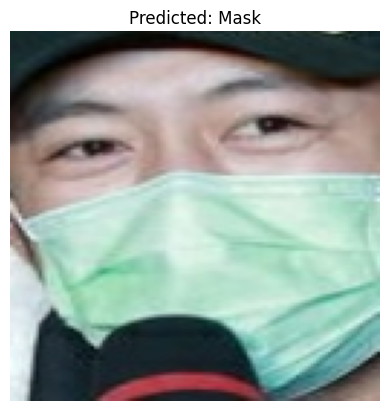

In [8]:
for images, labels in val_ds.take(1):                              # Take one batch
    preds = model.predict(images)                                  # Get predictions
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.title(f"Predicted: {'Mask' if preds[0] < 0.5 else 'No Mask'}")
    plt.axis('off')
    plt.show()
    break